In [ ]:
#对LS进行尝试

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import random
from numpy import *

feature1=pd.read_csv('Area10_100.csv')#第十次循环和第一百次循环的电压差之和
feature2=pd.read_csv('Area100_150.csv')#第十次循环和第一百次循环的电压差之和
label=pd.read_csv('Cycle_life.csv')#三个电池数据集的循环寿命
feature1=feature1.iloc[:,-1]
feature2=feature2.iloc[:,-1]
feature= pd.concat([feature1, feature2],axis=1)
label=label.iloc[:,-1]

In [90]:
import math

labellog=[]
for i in label:
    labellog.append(math.log(i,10))


In [91]:
_class=np.random.randint(0,3,size=len(label))
_class

array([0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [100]:

di={'F1':feature1,
      'F2':feature2,
      'label':labellog,
    'class':_class
}
data=pd.DataFrame(di)
# print(data['F1'].mean())
# if data['label']==1852:
#     data['F1']=data['F1']+1
#data.loc[data['label']==1852,'F1']=data[data['label']==1852]['F1']-1
data

,F1,F2,label,class
0,0.002164,0.008169,3.267641,0
1,0.004189,0.008618,3.334454,2
2,0.004242,0.008344,3.349666,0
3,0.011217,0.010584,3.156549,2
4,0.007987,0.009057,3.232742,2
...,...,...,...,...
119,0.012306,0.011697,3.062958,1
120,0.016484,0.011517,2.900913,1
121,0.014701,0.007465,2.895423,1
122,0.016950,0.008597,2.973128,0


rowdata:            F1        F2     label  class
0    0.002164  0.008169  3.267641      0
1    0.004189  0.008618  3.334454      2
2    0.004242  0.008344  3.349666      0
3    0.011217  0.010584  3.156549      2
4    0.007987  0.009057  3.232742      2
..        ...       ...       ...    ...
119  0.012306  0.011697  3.062958      1
120  0.016484  0.011517  2.900913      1
121  0.014701  0.007465  2.895423      1
122  0.016950  0.008597  2.973128      0
123  0.011296  0.004812  3.255514      0

[124 rows x 4 columns]
i: 0
[[1.]
 [1.]
 [1.]]
var_list: [[0.007037309413931406, 0.002502141731327084, 0.056176393117211496, 0.0], [0.0002631833753567505, 0.00021523116981734308, 0.020983990297401136, 0.0], [0.0007619416904789682, 0.0004971347864009544, 0.029072958173746357, 0.0]]
更新的data：            F1        F2     label  class
0    0.000006  0.000009  3.267641      0
1    0.000012  0.000010  3.334454      0
2    0.000012  0.000009  3.349666      0
3    0.000031  0.000012  3.156549      0
4 

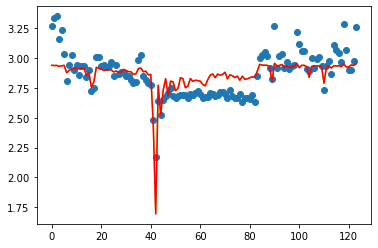

<Figure size 432x288 with 0 Axes>

In [101]:
#直接按照求解模型系数的公式得到


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from operator import itemgetter


def LeastSquareMethod(data):
    X=data[['F1','F2']]
    Y=data[['label']]
    """
        最小二乘法
    :param X: 未进行扩展的X矩阵
    :param Y: X矩阵相对应的结果集矩阵
    :return X_b: 进行扩展处理后的X矩阵
    :return omega: 使用最小二乘法求得的w
    """
    # 对X矩阵进行扩展
    X_b = np.c_[np.ones((len(X), 1)), X]
    '''
    np.linalg.inv用来求矩阵的逆矩阵
    dot表示矩阵m*n与n*r矩阵相乘
    T表示矩阵的转置
    '''
    '''omega代表模型系数（加上b）矩阵'''
    omega = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    
    return X_b, omega

def iterate(rowdata,w):
    '''
    更新隐变量
    根据min单个样本的误差
    公式min(ai(y-Xw))判断使用哪个的方差最小就将该行归属于哪一类（三批）
    '''
    #首先计算当前分类结果的方差（x有多个特征就计算多次）
    #遍历dataframe，每一个样本根据min(ai(y-Xw))计算哪一个批次的方差最小，改变其分类
    #最后返回根据分类将样本与方差相乘
    var_list=[]
    for i in range(3):
        lamuda=[]
        for item in data:
            lamuda.append(data[data['class']==i][item].var())
        var_list.append(lamuda) 
    print("var_list:",var_list)
    _data=data
    for i in range(len(_data)):
        s1=_data.loc[i,:]['F1']
        s2=_data.loc[i,:]['F2']# 输出每一行
        y=_data.loc[i,:]['label']
#         print("s1:",s1)
#         print("s2:",s2)
#         print("var_list[0][0]:",var_list[0][0])
#         print("var_list[0][1]:",var_list[0][1])
#         print("var_list[1][0]:",var_list[1][0])
#         print("var_list[1][1]:",var_list[1][1])
#         print("var_list[2][0]:",var_list[2][0])
#         print("var_list[2][1]:",var_list[2][1])
#         print("y:",y)
#         print("加权x:",mat([s1*var_list[0][0],s2*var_list[0][1],1]))
#         print("模型系数：",w)
#         print("选择方差最小的作为新的分类:------------------------------------------------------------")
#         print("第1个分类的方差：",mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w))
#         print("第2个分类的方差：",mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w))
#         print("第3个分类的方差：",mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w))
        minvalue=min(y-mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w),
                    y-mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w),
                    y-mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w))
#         print(y-mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w))
#         print(y-mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w))
#         print(y-mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w))
        if minvalue==y-mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w):
            _data.loc[i,'class']=0
        if minvalue==y-mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w):
            _data.loc[i,'class']=1
        if minvalue==y-mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w):
            _data.loc[i,'class']=2
            
    
    #data.sort_values(by='class',axis=0,ascending=True,inplace=True)
    for i in range(3):
        name=['F1','F2']
        for item in name:
            temp=data[data['class']==i][item].var()
            _data.loc[data['class']==i,item]=data[data['class']==i][item]*temp
    print("更新的data：",_data)
    return _data

        
if __name__ == '__main__':
    Y=data['label']
    X_b1, omega1 = LeastSquareMethod(data)
    changedata=data
    for i in range(4):
        
        print("rowdata:",changedata)
        print("i:",i)
        if i==0:
            w=np.ones((3,1))
        else :
            w=omega
        print(w)
        #初始化w？不需要也行啊
        #将每个样本的权重求出之后与X,Y相乘，聚类计算以(yi-XiW)减小方向更新
        _data=iterate(data,w)
        #求解模型系数的过程，矩阵求法
        X_b, omega = LeastSquareMethod(_data)
        changedata=_data
        
    #利用拟合的模型进行预测
    
    Y3=X_b1.dot(omega1)
    Y2 = X_b.dot(omega)
    X=np.arange(len(Y))
    plt.plot(X, Y3, 'y')
    plt.plot(X, Y, 'o')
    plt.plot(X, Y2, 'r')
    plt.show()
    plt.savefig( 'ls and em_ls.png')

In [26]:
var_list=[[0.0006259520960655154, 0.00041617447743973944, 0.03436945469045328, 0.0], [0.0022486414518263346, 0.0025493381817307792, 0.04462235532090476, 0.0], [0.0059164702715468614, 0.0004563657792687186, 0.026773151461556077, 0.0]]
print(var_list[0][0])
print(var_list[0][1])
print(var_list[1][0])
print(var_list[1][1])
print(var_list[2][0])
print(var_list[2][1])

0.0006259520960655154
0.00041617447743973944
0.0022486414518263346
0.0025493381817307792
0.0059164702715468614
0.0004563657792687186


In [190]:
data

,F1,F2,label,class
0,2.619769e-312,0.0,3.267641,2
1,5.071503e-312,0.0,3.334454,2
2,5.135885e-312,0.0,3.349666,2
3,1.358191e-311,0.0,3.156549,2
4,9.670622e-312,0.0,3.232742,2
...,...,...,...,...
119,1.490006e-311,0.0,3.062958,2
120,1.995887e-311,0.0,2.900913,2
121,1.779973e-311,0.0,2.895423,2
122,2.052262e-311,0.0,2.973128,2


In [111]:
s=mat([1,2,3])
b=mat([1],[2],[3])
b.shape

TypeError: asmatrix() takes from 1 to 2 positional arguments but 3 were given

In [89]:
s=data
hh=s[s['class']==0]['F1'].var()
s.loc[s['class']==0,'F1']=s[s['class']==0]['F1']*hh
# print(s[s['class']==0]['F1'])
s

,F1,F2,label,class
0,0.002164,0.008169,1852.0,2
1,0.000024,0.008618,2160.0,0
2,0.004242,0.008344,2237.0,2
3,0.011217,0.010584,1434.0,2
4,0.007987,0.009057,1709.0,1
...,...,...,...,...
119,0.000071,0.011697,1156.0,0
120,0.000095,0.011517,796.0,0
121,0.014701,0.007465,786.0,1
122,0.016950,0.008597,940.0,1


In [151]:
data

,F1,F2,label,class
0,0.002164,0.008169,3.267641,1
1,0.004189,0.008618,3.334454,0
2,0.004242,0.008344,3.349666,0
3,0.011217,0.010584,3.156549,2
4,0.007987,0.009057,3.232742,1
...,...,...,...,...
119,0.012306,0.011697,3.062958,1
120,0.016484,0.011517,2.900913,1
121,0.014701,0.007465,2.895423,2
122,0.016950,0.008597,2.973128,2


In [167]:
df=data
print(df)
for i in range(len(df)):
    s1=_data.loc[i,:]['F1']
    print(s1)
    if df.loc[i,:]['F1']<1:
        #print("gfhg")
        #data.loc[data['label']==1852,'F1']
        df.loc[i,'class']=3
        
print(df)

           F1        F2     label  class
0    0.002164  0.008169  3.267641      3
1    0.004189  0.008618  3.334454      3
2    0.004242  0.008344  3.349666      3
3    0.011217  0.010584  3.156549      3
4    0.007987  0.009057  3.232742      3
..        ...       ...       ...    ...
119  0.012306  0.011697  3.062958      3
120  0.016484  0.011517  2.900913      3
121  0.014701  0.007465  2.895423      3
122  0.016950  0.008597  2.973128      3
123  0.011296  0.004812  3.255514      3

[124 rows x 4 columns]
1.5022072126134598e-05
1.0502624113281887e-06
1.0635952469747869e-06
2.8957498816359224e-05
5.5452524028765703e-05
0.00012986300404777378
7.343694176238979e-05
0.00019968460853694238
4.217325514312907e-06
2.505045582634528e-06
4.163144338970342e-06
3.7280560281470467e-06
4.67856148337012e-05
3.610177752188979e-06
0.00338627172790376
7.5769415782480766e-06
0.0002037012969923908
0.00016710575723146597
5.650841273728659e-06
0.00015004618775449157
5.283164974773208e-05
0.000212680336

In [148]:
from numpy import *
df=data
w=mat([0,1,0])
for row in df.itertuples():
    s1=getattr(row, 'F1') # 输出每一行
    s2=getattr(row, 'F2')
    
    if(s1<0.012):
        #df.loc[df['F1']==s,'F1']=df[df['F1']==s]['F1']-1
        df[row,'label']=0
print(df)
#获得乘以方差的矩阵

           F1        F2     label  class  \
0    0.002164  0.008169  3.267641      1   
1    0.004189  0.008618  3.334454      0   
2    0.004242  0.008344  3.349666      0   
3    0.011217  0.010584  3.156549      2   
4    0.007987  0.009057  3.232742      1   
..        ...       ...       ...    ...   
119  0.012306  0.011697  3.062958      1   
120  0.016484  0.011517  2.900913      1   
121  0.014701  0.007465  2.895423      2   
122  0.016950  0.008597  2.973128      2   
123  0.011296  0.004812  3.255514      0   

     ((0, 0.0021636970927425, 0.0081686408943553, 3.2676409823459154, 1), label)  \
0                                                    0                             
1                                                    0                             
2                                                    0                             
3                                                    0                             
4                                                  

In [1]:
#直接按照求解模型系数的公式得到


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from operator import itemgetter


def LeastSquareMethod(data):
    X=data[['F1','F2']]
    Y=data[['label']]
    """
        最小二乘法
    :param X: 未进行扩展的X矩阵
    :param Y: X矩阵相对应的结果集矩阵
    :return X_b: 进行扩展处理后的X矩阵
    :return omega: 使用最小二乘法求得的w
    """
    # 对X矩阵进行扩展
    X_b = np.c_[np.ones((len(X), 1)), X]
    '''
    np.linalg.inv用来求矩阵的逆矩阵
    dot表示矩阵m*n与n*r矩阵相乘
    T表示矩阵的转置
    '''
    '''omega代表模型系数（加上b）矩阵'''
    omega = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    
    return X_b, omega

def iterate(data,w):
    X=data[['F1','F2']]
    Y=data[['label']]
    '''
    更新隐变量
    根据min单个样本的误差
    公式min(ai(y-Xw))判断使用哪个的方差最小就将该行归属于哪一类（三批）
    '''
    #首先计算当前分类结果的方差（x有多个特征就计算多次）
    #遍历dataframe，每一个样本根据min(ai(y-Xw))计算哪一个批次的方差最小，改变其分类
    #最后返回根据分类将样本与方差相乘
    var_list=[]
    for i in range(3):
        lamuda=[]
        for item in data:
            lamuda.append(data[data['class']==i][item].var())
        var_list.append(lamuda) 
    _data=data
    for row in df.itertuples():
        s1=getattr(row, 'F1')
        s2=getattr(row, 'F2')# 输出每一行
        y=getattr(row,'label')
    
        minvalue=min(getattr(row,'label')-mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w.T),
                    getattr(row,'label')-mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w.T),
                    getattr(row,'label')-mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w.T))
        if minvalue==getattr(row,'label')-mat([s1*var_list[0][0],s2*var_list[0][1],1]).dot(w.T):
            _data[row,'label']=0
        if minvalue==getattr(row,'label')-mat([s1*var_list[1][0],s2*var_list[1][1],1]).dot(w.T):
            _data[row,'label']=1
        if minvalue==getattr(row,'label')-mat([s1*var_list[2][0],s2*var_list[2][1],1]).dot(w.T):
            _data[row,'label']=2
   
    #data.sort_values(by='class',axis=0,ascending=True,inplace=True)
    for i in range(3):
        name=['F1','F2']
        for item in name:
            temp=data[data['class']==i][item].var()
            _data.loc[data['class']==i,item]=data[data['class']==i][item]*temp
    return _data

        
if __name__ == '__main__':
    Y=data['label']
    for i in range(1):
        if i==0:
            w=mat([0.343,0.654,0.1234])
        else :
            w=omega
        #初始化w？不需要也行啊
        #将每个样本的权重求出之后与X,Y相乘，聚类计算以(yi-XiW)减小方向更新
        _data=iterate(data,w)
        #求解模型系数的过程，矩阵求法
        X_b, omega = LeastSquareMethod(_data)
        print(omega)
    #利用拟合的模型进行预测
    Y2 = X_b.dot(omega)
    X=np.arange(len(Y))
    plt.plot(X, Y, 'o')
    plt.plot(X, Y2, 'r')
    plt.show()

NameError: name 'data' is not defined

In [16]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


 
-3.944 x + 2.971


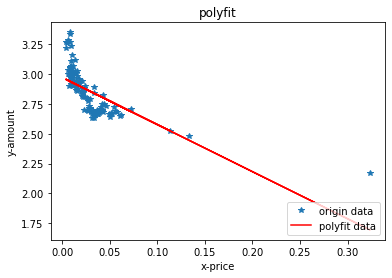

<Figure size 432x288 with 0 Axes>

In [12]:
# ols的直接拟合
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.array(feature.iloc[:,-1])
# y = np.array(labellog)
# # 准备数据,将(x,y)坐标点进行输入

# # 使用polyfit方法来拟合,并选择多项式,这里先使用2次方程
# z1 = np.polyfit(x, y, 1)
# # 使用poly1d方法获得多项式系数,按照阶数由高到低排列
# p1 = np.poly1d(z1)
# # 在屏幕上打印拟合多项式
# print(p1)
# # 求对应x的各项拟合函数值
# fx = p1(x)
# # 绘制坐标系散点数据及拟合曲线图
# plot1 = plt.plot(x, y, '*', label='origin data')
# plot2 = plt.plot(x, fx, 'r', label='polyfit data')
# plt.xlabel('x-price')
# plt.ylabel('y-amount')
# plt.legend(loc=4)  # 指定legend的位置,类似象限的位置
# plt.title('polyfit')
# plt.show()
# plt.savefig('polyfit.png')

In [70]:
label=pd.read_csv('Cycle_life.csv')#三个电池数据集的循环寿命
feature1=feature1.iloc[:,-1]
feature2=feature2.iloc[:,-1]
feature= pd.concat([feature1, feature2],axis=1)
label=label.iloc[:,-1]
x = feature.iloc[:,-1]
d = label
print(type(x))
print(x)
print(type(d))
print(d)

<class 'pandas.core.series.Series'>
0      0.008169
1      0.008618
2      0.008344
3      0.010584
4      0.009057
         ...   
119    0.011697
120    0.011517
121    0.007465
122    0.008597
123    0.004812
Name: 0, Length: 124, dtype: float64
<class 'pandas.core.series.Series'>
0      1852.0
1      2160.0
2      2237.0
3      1434.0
4      1709.0
        ...  
119    1156.0
120     796.0
121     786.0
122     940.0
123    1801.0
Name: 0, Length: 124, dtype: float64


In [73]:
XX=pd.concat([X, y],axis=1)
XX

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [84]:
X=data[['F1','F2']]
Y=data[['label']]
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [145]:
#直接按照求解模型系数的公式得到


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from operator import itemgetter


def LeastSquareMethod(data):
    X=data[['F1','F2']]
    Y=data[['label']]
    """
        最小二乘法
    :param X: 未进行扩展的X矩阵
    :param Y: X矩阵相对应的结果集矩阵
    :return X_b: 进行扩展处理后的X矩阵
    :return omega: 使用最小二乘法求得的w
    """
    # 对X矩阵进行扩展
    X_b = np.c_[np.ones((len(X), 1)), X]
    '''
    np.linalg.inv用来求矩阵的逆矩阵
    dot表示矩阵m*n与n*r矩阵相乘
    T表示矩阵的转置
    '''
    '''omega代表模型系数（加上b）矩阵'''
    omega = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    
    return X_b, omega

def iterate(data):
    X=data[['F1','F2']]
    Y=data[['label']]
    '''
    更新隐变量
    根据min单个样本的误差
    '''
    
    clf = KMeans(n_clusters=3)  #输出完整的KMeans函数
    y_pred = clf.fit_predict(X)  #输出聚类预测结果
    h=pd.DataFrame(y_pred,columns=['class'])
    print(y_pred)
    data=pd.concat([data,h],axis=1)
    print(data)
    #data.sort_values(by='class',axis=0,ascending=True,inplace=True)
    var_list=[]
    for index in range(3):
        s=data[data['class']==index]
        mean=[]
        name_list=['F1','F2']
        for name in name_list:
            mean.append(s[name].var())
        var_list.append(mean)
    print(var_list[0][0])
    for i in range(3):
        data[data['label']==i]['F1']*var_list[i][0]
        data[data['label']==i]['F2']*var_list[i][1]
        
    print(data)
    return var_list

        
if __name__ == '__main__':
    X = x
    Y = d
    for i in range(1):
        #初始化w？不需要也行啊
        #将每个样本的权重求出之后与X,Y相乘，聚类计算以(yi-XiW)减小方向更新
        lamuda=iterate(data)
        
        #求解模型系数的过程，矩阵求法
        X_b, omega = LeastSquareMethod(data)
        #利用拟合的模型进行预测
        Y2 = X_b.dot(omega)
        
        
#     plt.plot(X, Y, 'o')
#     plt.plot(X, Y2, 'r')
#     plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 2 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1]
           F1        F2   label  class
0    0.002164  0.008169  1852.0      1
1    0.004189  0.008618  2160.0      1
2    0.004242  0.008344  2237.0      1
3    0.011217  0.010584  1434.0      1
4    0.007987  0.009057  1709.0      1
..        ...       ...     ...    ...
119  0.012306  0.011697  1156.0      1
120  0.016484  0.011517   796.0      1
121  0.014701  0.007465   786.0      1
122  0.016950  0.008597   940.0      1
123  0.011296  0.004812  1801.0      1

[124 rows x 4 columns]
0.0009116301990869159
           F1        F2   label  class
0    0.002164  0.008169  1852.0      1
1    0.004189  0.008618  2160.0      1
2    0.004242  0.008344  2237.0      1
3    0.011217  0.010584  1434.0      1
4    0.007987  0.009057  1709.0      1

In [162]:
list1 = [[5,2,0,4],[2,3,4,4],[3,6,1,8],[4,1,0,8]]
df=pd.DataFrame(list1,index=list('1234'),columns=list('ABCD'))
df

,A,B,C,D
1,5,2,0,4
2,2,3,4,4
3,3,6,1,8
4,4,1,0,8


In [163]:
df[df['D']==8]['A']=df[df['D']==8]['A']*0.5


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_60172\441057346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['D']==8]['A']=df[df['D']==8]['A']*0.5


In [164]:
print(df)

   A  B  C  D
1  5  2  0  4
2  2  3  4  4
3  3  6  1  8
4  4  1  0  8
